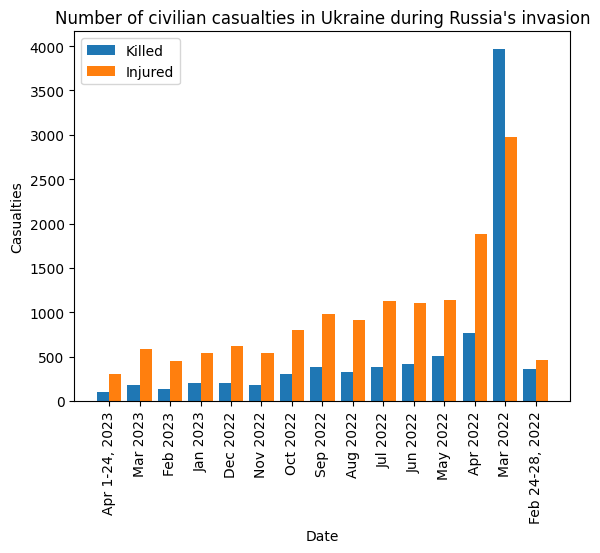

In [44]:
import matplotlib.pyplot as plt
import numpy as np 
import requests
from bs4 import BeautifulSoup

# Crawl statista website to get the information about monlthy war casualties
page = requests.get("https://www.statista.com/statistics/1318455/ukraine-war-casualties-monthly")
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', id="statTableHTML")
header = []
rows = []
for i, row in enumerate(table.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])
date = []
killed = []
injured = []
for row in rows:
    date.append(row[0])
    killed.append(int(row[1].replace(',', '')))
    injured.append(int(row[2].replace(',', '')))
    
X_axis = np.arange(len(date))
plt.bar(X_axis - 0.2, killed, 0.4, label = 'Killed')
plt.bar(X_axis + 0.2, injured, 0.4, label = 'Injured')
plt.xticks(X_axis, date,rotation=90)
plt.xlabel("Date")
plt.ylabel("Casualties")
plt.title("Number of civilian casualties in Ukraine during Russia's invasion")
plt.legend()
plt.show()

In [65]:
# Crawl statista website to get the information about military capabilities of Russia and Ukraine
from tabulate import tabulate

page = requests.get("https://www.statista.com/statistics/1296573/russia-ukraine-military-comparison")
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', id="statTableHTML")
header = []
rows = []
for i, row in enumerate(table.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])

unit = []
russia = []
ukraine = []
header = ['Indicator', 'Russia', 'Ukraine']
tabledata = []
tabledata.append(header)
for row in rows:
    if(row[1] !='-' and row[2]!='-'):
        tableRows = []
        tableRows.append(row[0])
        tableRows.append(int(row[1].replace(',', '')))
        tableRows.append(int(row[2].replace(',', '')))
        tabledata.append(tableRows)
print(tabulate(tabledata, headers='firstrow', tablefmt='fancy_grid'))


╒══════════════════════════════════════╤══════════╤═══════════╕
│ Indicator                            │   Russia │   Ukraine │
╞══════════════════════════════════════╪══════════╪═══════════╡
│ Estimated total military personnel   │  1330900 │    500000 │
├──────────────────────────────────────┼──────────┼───────────┤
│ Active soldiers                      │   830900 │    200000 │
├──────────────────────────────────────┼──────────┼───────────┤
│ Reserve forces                       │   250000 │    250000 │
├──────────────────────────────────────┼──────────┼───────────┤
│ Paramilitary units                   │   250000 │     50000 │
├──────────────────────────────────────┼──────────┼───────────┤
│ Total aircraft                       │     4182 │       312 │
├──────────────────────────────────────┼──────────┼───────────┤
│ Total helicopters                    │     1531 │       113 │
├──────────────────────────────────────┼──────────┼───────────┤
│ Fighters                             │

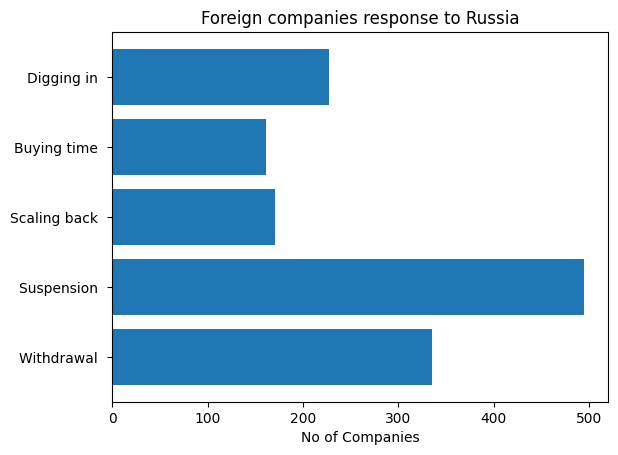

In [71]:
# Crawl statista website to get the information about foreign companies response to Russia
from tabulate import tabulate

page = requests.get("https://www.statista.com/statistics/1308773/foreign-company-response-to-russia-ukraine-war")
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', id="statTableHTML")
header = []
rows = []
for i, row in enumerate(table.find_all('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])
action = []
noOfComp = []
for row in rows:
    action.append(row[0].split('(')[0])
    noOfComp.append((int(row[1].replace(',', ''))))
plt.barh(action, noOfComp)
plt.xlabel("No of Companies")
plt.title("Foreign companies response to Russia")
plt.show()
